<h1> Customer Segmentation </h1>

<h1> Goal:!!!!</h1>
    <h3>Our aim is to divide your customers up based on common characteristics </h3>

Importing the Dependencies

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection and Analysis

In [73]:
#loading the data
df=pd.read_csv("Mall_Customers.csv")

In [74]:
df.head()  

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<h2> EDA </h2>

In [75]:
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
122,123,Female,40,69,58
117,118,Female,49,65,59
194,195,Female,47,120,16
32,33,Male,53,33,4
127,128,Male,40,71,95
21,22,Male,25,24,73
13,14,Female,24,20,77
128,129,Male,59,71,11
188,189,Female,41,103,17
71,72,Female,47,49,42


In [76]:
df.shape

(200, 5)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [78]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


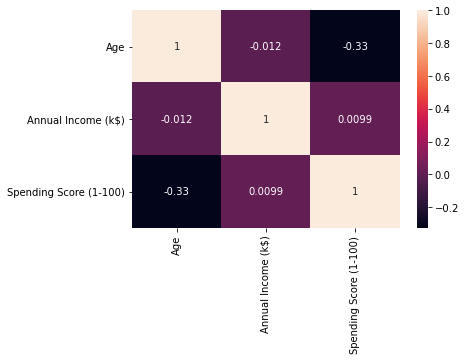

In [79]:
sns.heatmap(df.drop('CustomerID',axis=1).corr(),annot=True)

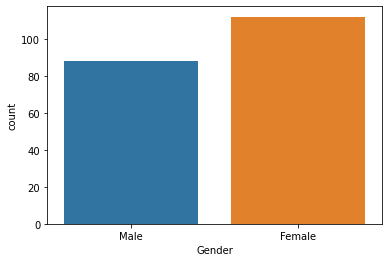

In [80]:
sns.countplot(data=df,x='Gender');

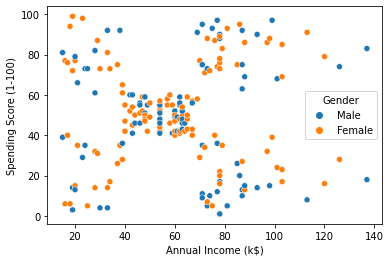

In [81]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Gender');

**Intuitively we can see that 5 clusters can be reasonable to group the data to.**


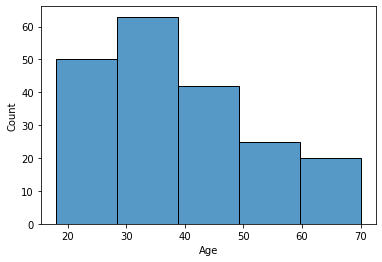

In [82]:
sns.histplot(data=df,x='Age',bins=5)

**Distribution is right skewed indicates as you get older you tend to spend less ;)**

<h3> Data Preparation </h3>

In [83]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [84]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [85]:
final_df = pd.concat([df_nums,df_objs],axis=1)

In [86]:
final_df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


In [87]:
df=final_df.drop('CustomerID',axis=1)

In [88]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


<h4>  Feature Scaling </h4>

In [89]:
#as K-means calculates distance metric
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(df)

In [92]:
from sklearn.cluster import KMeans

In [93]:
ssd = []

for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

<h2> Model Interpretation </h2>

Text(0, 0.5, ' Sum of Squared Distances')

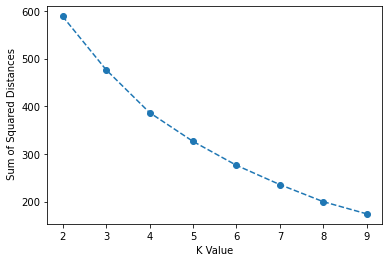

In [94]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [95]:
ssd

[588.8026767824932,
 476.78755441351575,
 386.82842558376643,
 326.3454878413872,
 276.18291622947805,
 235.66273782470483,
 199.78478208926091,
 174.2405727936236]

In [96]:
# Change in SSD from previous K value!
pd.Series(ssd).diff()

0           NaN
1   -112.015122
2    -89.959129
3    -60.482938
4    -50.162572
5    -40.520178
6    -35.877956
7    -25.544209
dtype: float64

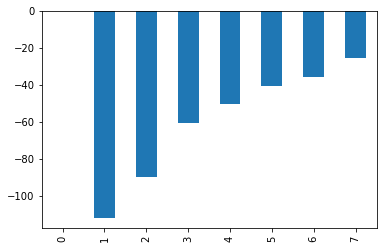

In [97]:
pd.Series(ssd).diff().plot(kind='bar')

<h3> We can see that after making clusters more than 5 cluster the difference is not too much. 
    Optimum clusters=5 </h3>  

In [100]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=101)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(df)

print(Y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 0 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 0 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


5 Clusters - 0, 1, 2, 3, 4

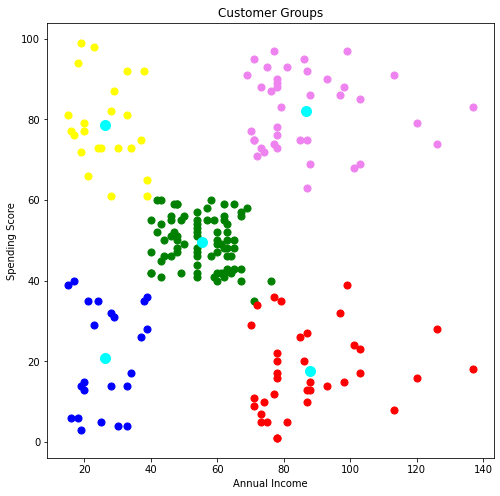

In [110]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(df.iloc[Y==0,1], df.iloc[Y==0,2], s=50, c='green', label='Cluster 1')
plt.scatter(df.iloc[Y==1,1], df.iloc[Y==1,2], s=50, c='red', label='Cluster 2')
plt.scatter(df.iloc[Y==2,1], df.iloc[Y==2,2], s=50, c='yellow', label='Cluster 3')
plt.scatter(df.iloc[Y==3,1], df.iloc[Y==3,2], s=50, c='violet', label='Cluster 4')
plt.scatter(df.iloc[Y==4,1], df.iloc[Y==4,2], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()